In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
plt.rcParams.update({"axes.grid": True})

## Formateo de Datos

In [98]:
flight_delay_data = pd.read_csv('Data/dataset_SCL.csv')
flight_delay_data.head()

/home/alonso/Desktop/Postulación IBM/Data-Scientist-Challenge-LATAM/data_scientist_challenge_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3221: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [99]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [100]:
len(flight_delay_data['Vlo-I'].unique())

750

In [101]:
flight_delay_data = flight_delay_data.astype(
    {
        'Fecha-I': 'datetime64',
        'Ori-I': 'string',
        'Des-I': 'string',
        'Emp-I': 'string',
        'Fecha-O': 'datetime64',
        'Ori-O': 'string',
        'Des-O': 'string',
        'Emp-O': 'string',
        'DIA': 'Int8',
        'MES': 'Int8',
        'AÑO': 'Int16',
        'DIANOM': 'string',
        'TIPOVUELO': 'string',
        'OPERA': 'string',
        'SIGLAORI': 'string',
        'SIGLADES': 'string'
    }
)

In [102]:
# Fix some numeric labels for Vlo-I column and Vlo-O because there were some floats as strings
list_vlo = ['Vlo-I', 'Vlo-O']

for vlo in list_vlo:
    

    non_string_condition = ~(flight_delay_data[vlo].apply(lambda x: isinstance(x, str)))
    flight_delay_data[non_string_condition] = flight_delay_data[non_string_condition].astype({vlo: 'Int16'})

    # Turn columns into strings
    flight_delay_data = flight_delay_data.astype({vlo: 'string'})

In [103]:
len(flight_delay_data['Vlo-I'].unique())

584

In [110]:
# In case the string value already had a float value, run the folowing block
list_vlo = ['Vlo-I', 'Vlo-O']

for vlo in list_vlo:  

    contains_float_condition = flight_delay_data[vlo].str.contains(".0")
    flight_delay_data[vlo][contains_float_condition] = flight_delay_data[vlo][contains_float_condition].str.replace(".0", "")

/tmp/ipykernel_300435/3402368578.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  flight_delay_data[vlo][contains_float_condition] = flight_delay_data[vlo][contains_float_condition].str.replace(".0", "")


In [111]:
len(flight_delay_data['Vlo-I'].unique())

427

In [112]:
flight_delay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  string        
 2   Ori-I      68206 non-null  string        
 3   Des-I      68206 non-null  string        
 4   Emp-I      68206 non-null  string        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  string        
 7   Ori-O      68206 non-null  string        
 8   Des-O      68206 non-null  string        
 9   Emp-O      68206 non-null  string        
 10  DIA        68206 non-null  Int8          
 11  MES        68206 non-null  Int8          
 12  AÑO        68206 non-null  Int16         
 13  DIANOM     68206 non-null  string        
 14  TIPOVUELO  68206 non-null  string        
 15  OPERA      68206 non-null  string        
 16  SIGLAORI   68206 non-null  string       

Una vez formateados los datos, se refleja que existe una fila con un dato `null` para la variable `Vlo-O`. No parece necesario eliminar o hacer cambios a la fila de momento, pues aún no se decide si la información proveída por la variable `Vlo-O` será utilizada para el análisis de tiempos de demora.

In [113]:
flight_delay_data[flight_delay_data['Vlo-O'].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,0,SCEL,SPJC,LAW,2017-01-19 11:03:00,<NA>,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


## 1. Figuras y Display de Datos

Con el fin de entender mejor la base de datos, se imprime la cantidad de valores únicos por variable, lo cual da una vista general para proponer visualizaciones adecuadas.

In [114]:
for column in flight_delay_data.columns:
    print(column, ' :', len(flight_delay_data[column].unique()))

Fecha-I  : 53252
Vlo-I  : 427
Ori-I  : 1
Des-I  : 64
Emp-I  : 30
Fecha-O  : 62774
Vlo-O  : 448
Ori-O  : 1
Des-O  : 63
Emp-O  : 32
DIA  : 31
MES  : 12
AÑO  : 2
DIANOM  : 7
TIPOVUELO  : 2
OPERA  : 23
SIGLAORI  : 1
SIGLADES  : 62


### Orígenes y destinos

Se puede ver que sólamente hay un origen, por lo que se asumirá que todos los datos corresponden a salidas desde Santiago de Chile. Por lo tanto, el problema se tratará acotadamente a los retrasos en despegar de los vuelos que salen de Santiago.

Debido a que para las variables de destino existen 3 tipos, la programada, con el sufijo `-I`, la de operación `-O` y la de destino `SIGLADES`, se deriva la pregunta de si son coincidentes los aeropuertos a los que se llegó, versus los que se tenía planificado llegar. Con los siguientes dos bloques de código se puede ver que algunos de los vuelos tienen más de un tipo de destino programado, para cada destino donde realmente aterrizaron, por lo que es posible conjeturar que en el conjunto de datos hay vuelos que aterrizaron en aeropuertos distintos a los que se esperaba. En el caso de operación, este resulta equivalente a `SIGLADES` pues aquellos valores que tienen más de un aeropuerto asociado son en Buenos Aires.

In [115]:
for dest_name, df_dest_name in flight_delay_data.groupby("SIGLADES"):
    
    if len(df_dest_name['Des-I'].unique()) != 1:
        print(
            'Possible values for ', dest_name, ": \n",
            list(df_dest_name['Des-I'].unique()), "\n"
        )

Possible values for  Buenos Aires : 
 ['SAEZ', 'SABE', 'SEGU'] 

Possible values for  Calama : 
 ['SCCF', 'SCFA'] 

Possible values for  Cataratas Iguacu : 
 ['SBFI', 'SARI'] 

Possible values for  Melbourne : 
 ['YMML', 'YSSY'] 

Possible values for  Miami : 
 ['KMIA', 'KJFK'] 

Possible values for  Puerto Montt : 
 ['SCTE', 'SCBA', 'SCCI', 'SCIE'] 

Possible values for  Punta Arenas : 
 ['SCCI', 'SCTE'] 

Possible values for  Quito : 
 ['SEQM', 'SEQU'] 

Possible values for  Rio de Janeiro : 
 ['SBGL', 'SBGR'] 

Possible values for  Temuco : 
 ['SCTE', 'SCQP', 'SCIE'] 



In [118]:
for dest_name, df_dest_name in flight_delay_data.groupby("SIGLADES"):
    
    if len(df_dest_name['Des-O'].unique()) != 1:
        print(
            'Possible values for ', dest_name, ": \n",
            list(df_dest_name['Des-O'].unique()), "\n"
        )

Possible values for  Buenos Aires : 
 ['SAEZ', 'SABE'] 



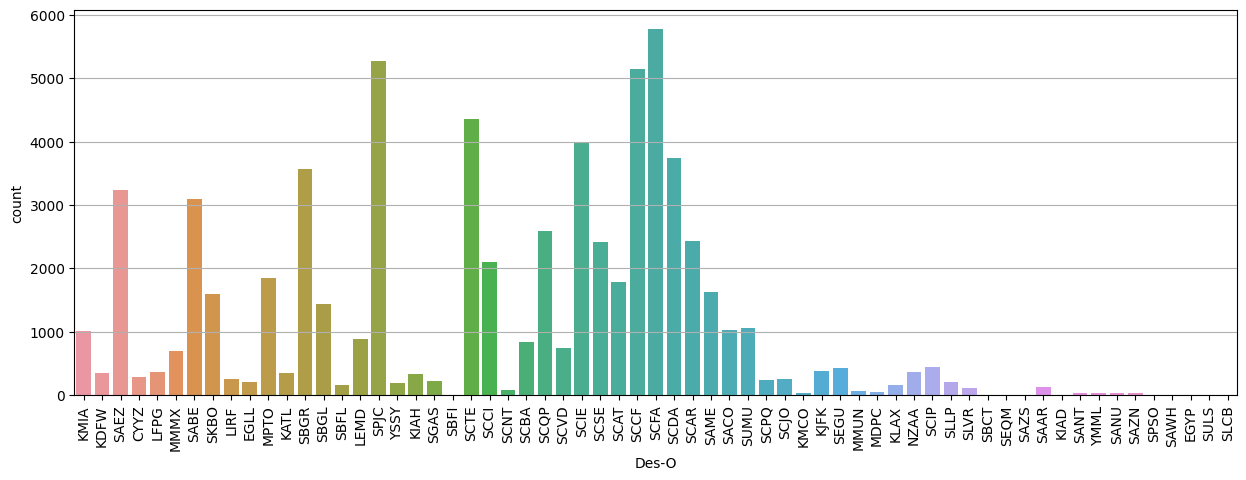

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='Des-O',
)
plt.xticks(rotation = 90)
plt.show()

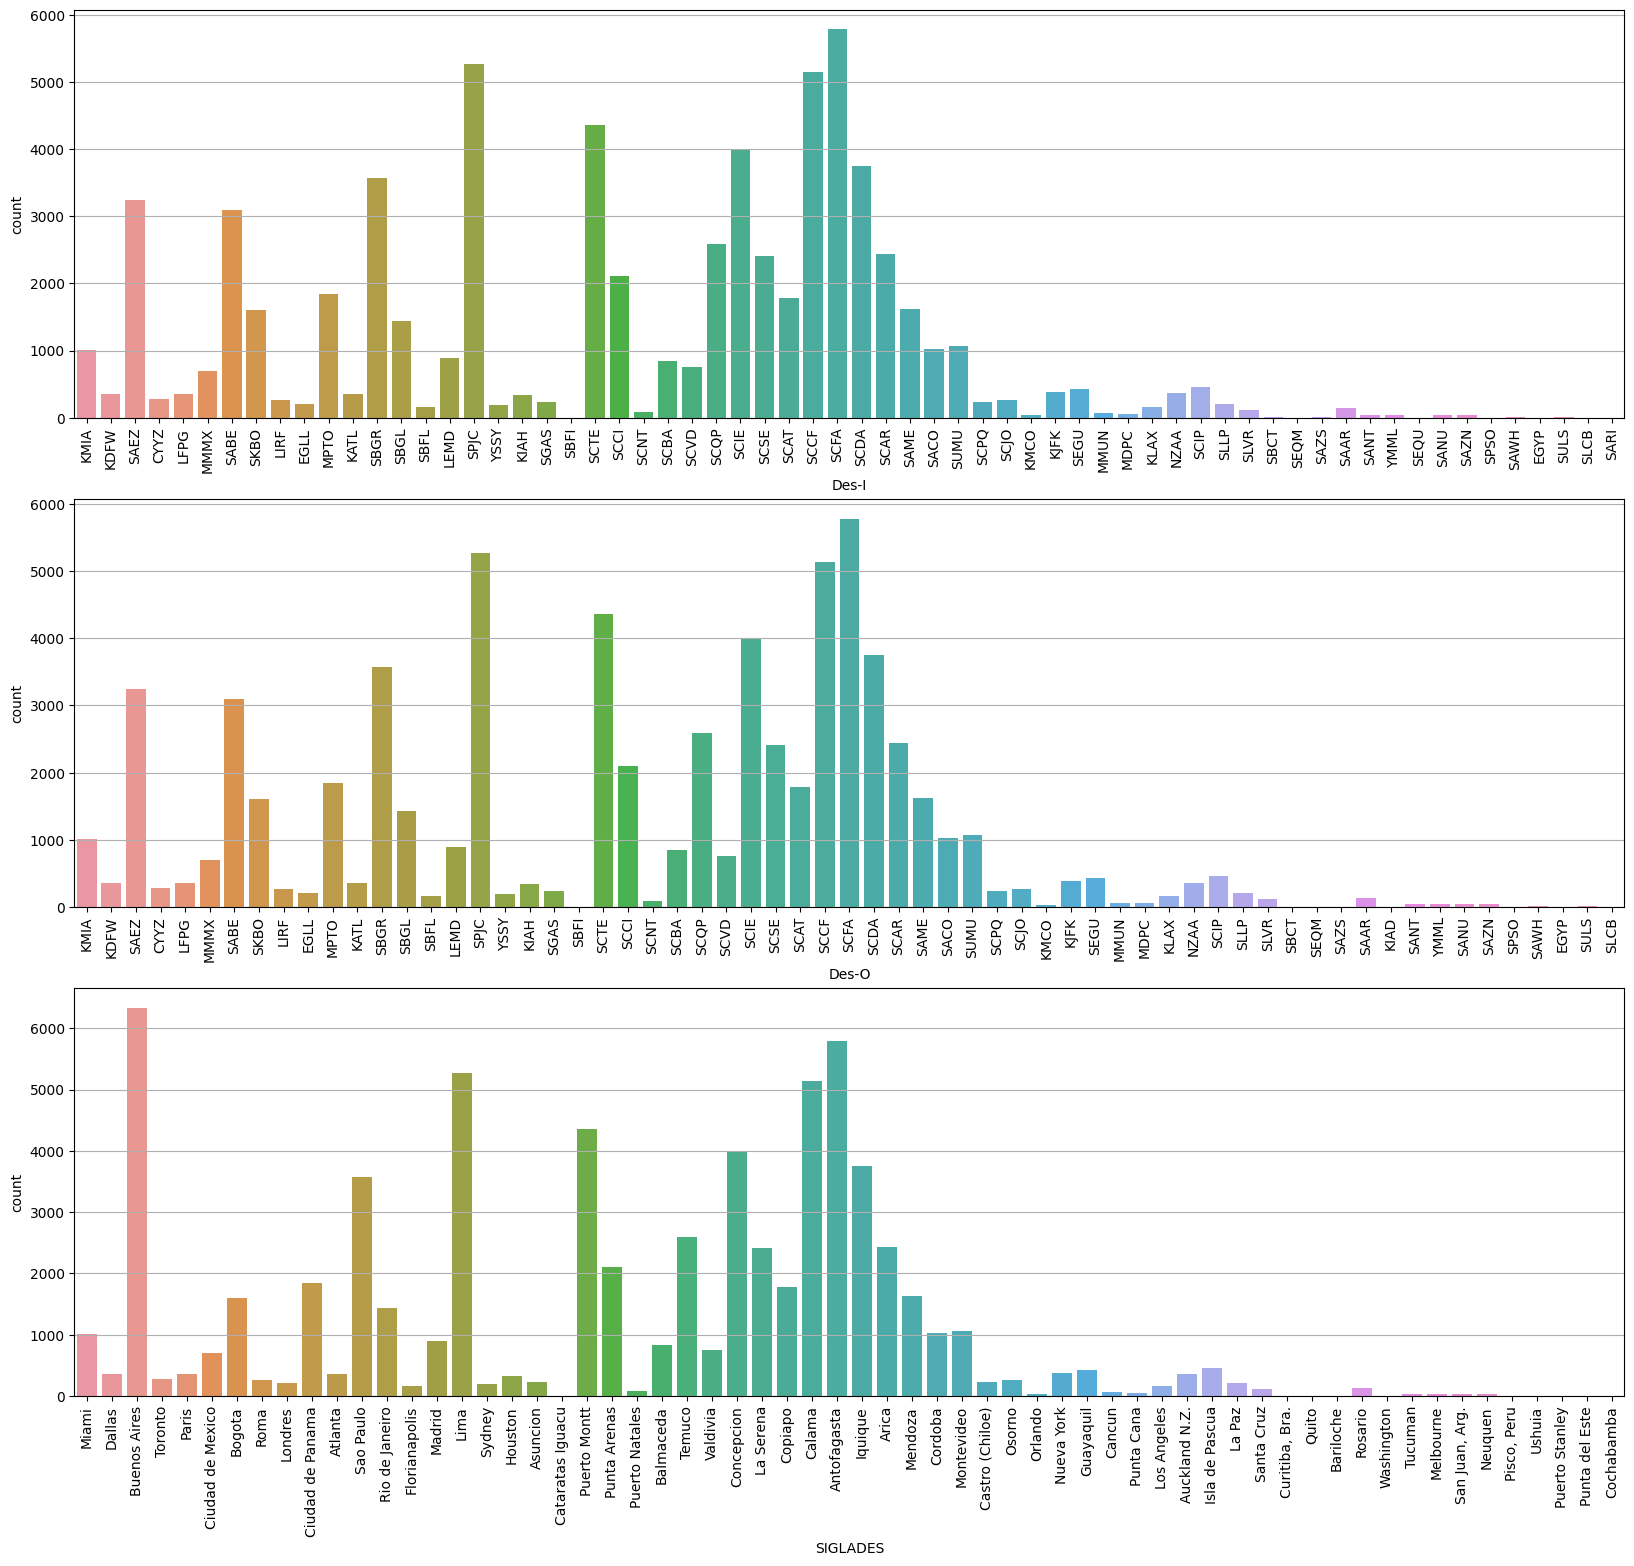

In [134]:
fig, ax = plt.subplots(3, figsize=(20,18))
list_to_display_count = ["Des-I", "Des-O", "SIGLADES"]

for i, column in enumerate(list_to_display_count):

    sns.countplot(ax=ax[i],
        data=flight_delay_data,
        x=column,
    )

    ax[i].tick_params(axis='x', rotation=90)

Se puede ver en el gráfico del bloque anterior que Buenos Aires presenta este aumento en frecuencia de vuelos debido a la suma de los dos aeropuertos que allí se encuentran SAEZ y SABE.

### Cuenta mensual de vuelos por tipo de vuelo y día de la semana

Por otro lado, yendo a una vista mensual de los datos, se denotan los meses donde hay mayor y menor cantidad de vuelos, siendo junio el mes de menos vuelos, mientras que diciembre correspondería al de mayor volumen de vuelos superando los 6.000.

Cabe mencionar que hay dos datos correspondientes al 2018, los cuales pretendían salir antes de media noche del último día de 2017, pero debido a retrasos, salieron los primeros minutos de 2018.

Desde una vista comparativa entre vuelos nacionales e internacionales por mes, se denota una inclinación hacia mayor presencia de datos de vuelos nacionales en distintas proporciones a lo largo de todo el año 2017.

Por último, se grafican los días de la semana, en caso de que se pueda concluir fácilmente sobrerrepresentación de ciertos días, lo cual no es el caso, por lo que para derivar conclusiones de este gráfico se debiesen realizar operaciones cuantitativas.

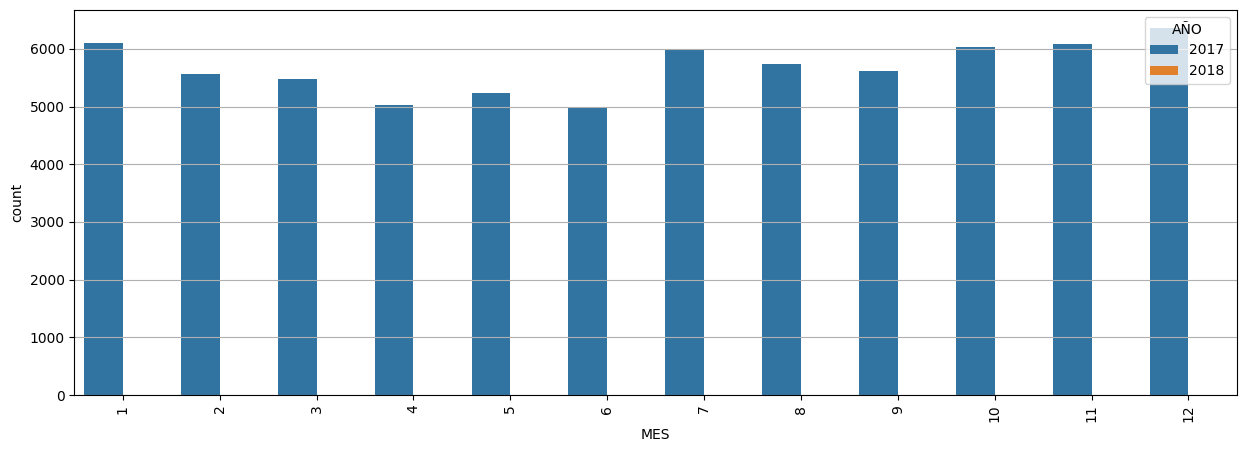

In [135]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='AÑO'
)
plt.xticks(rotation = 90)
plt.show()

In [136]:
flight_delay_data['AÑO'].unique()

<IntegerArray>
[2017, 2018]
Length: 2, dtype: Int16

In [137]:
flight_delay_data[flight_delay_data['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,2,SCEL,KLAX,LAN,2018-01-01 00:02:00,2,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


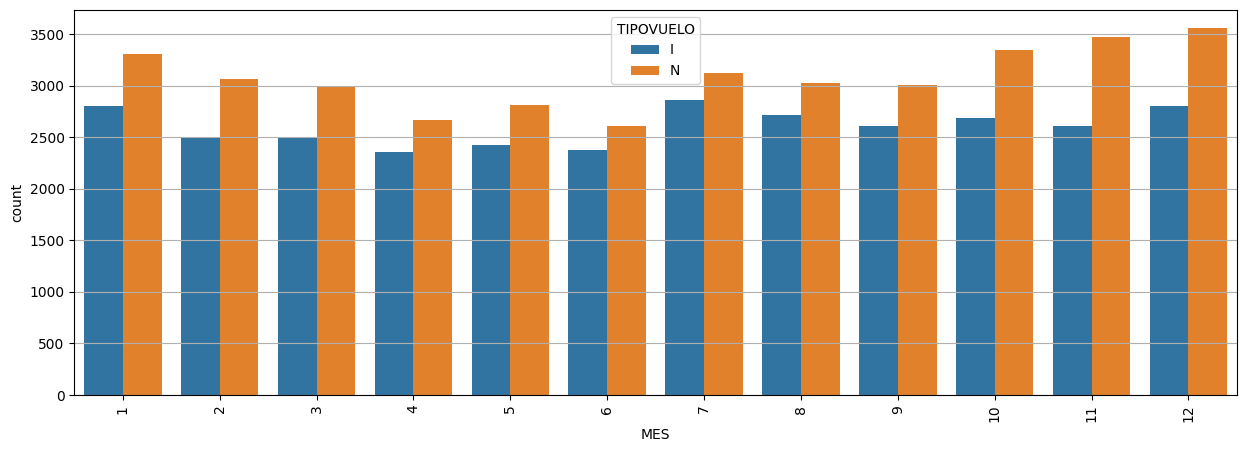

In [145]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='TIPOVUELO'
)
plt.xticks(rotation = 90)
plt.show()

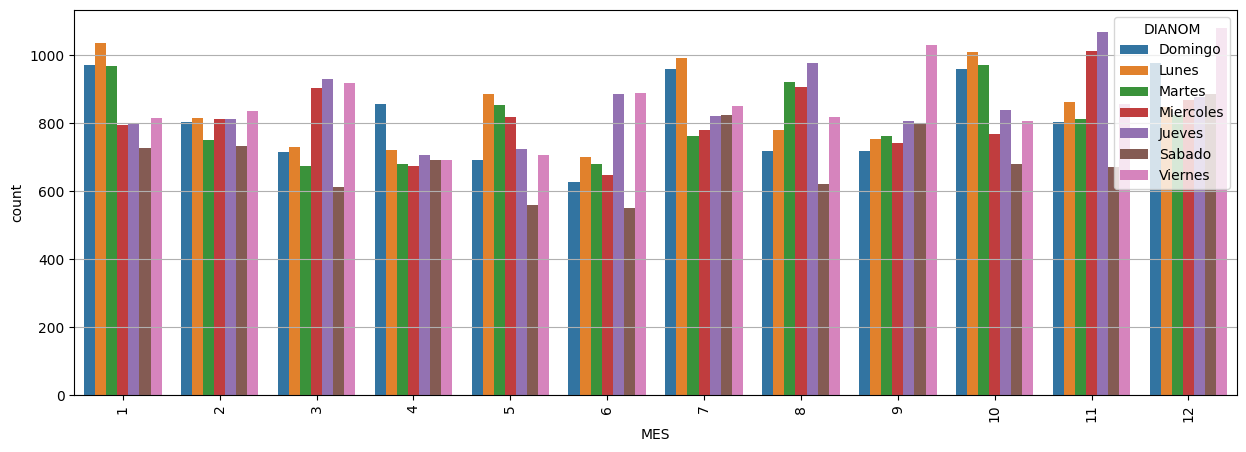

In [163]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='MES',
    hue='DIANOM'
)
plt.xticks(rotation = 90)
plt.show()

### Representación de operadores

Con respecto a operadores de los vuelos presentes en el conjunto de datos, se evidencia que las aerolíneas predominantes en Santiago son LATAM y Sky Airlines.

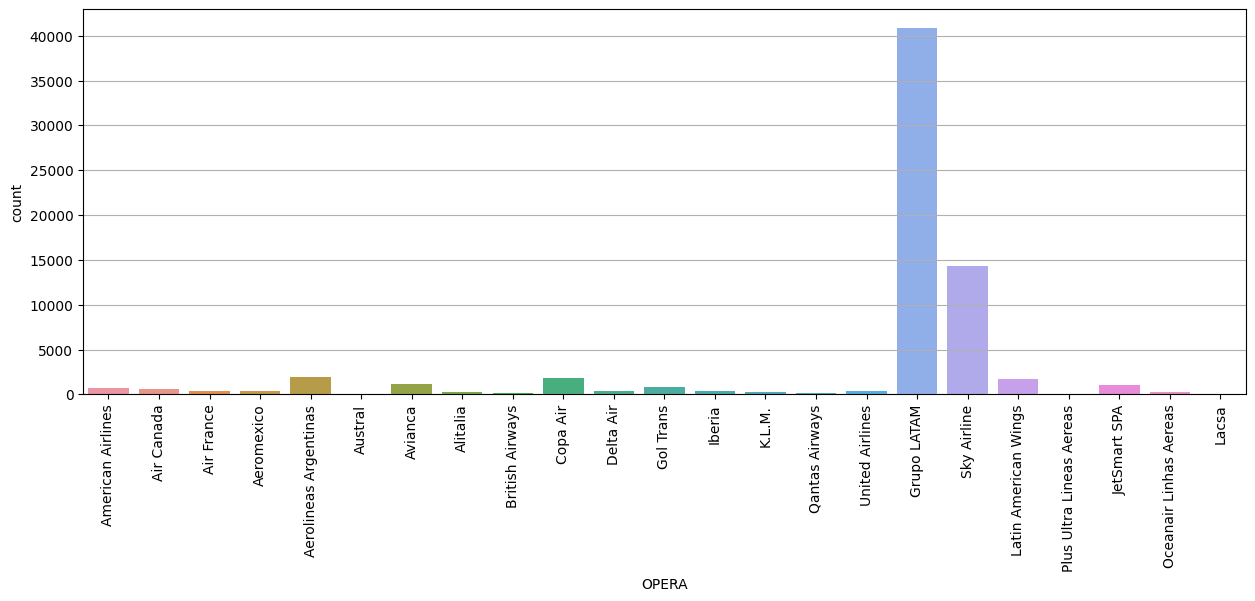

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=flight_delay_data,
    x='OPERA'
)
plt.xticks(rotation = 90)
plt.show()

### Vuelos por hora y cantidad de vuelos por día.

Por último se grafica la cantidad de vuelos por hora en `Fecha-I`, donde es clara la preferencia de ciertas horas para la salida de vuelos. 

<AxesSubplot:xlabel='Fecha-I'>

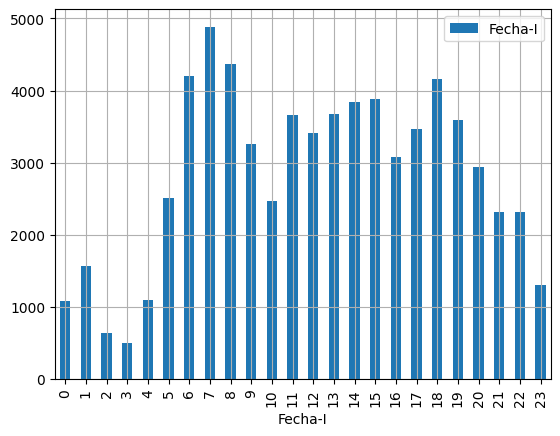

In [159]:
flight_delay_data[["Fecha-I"]].groupby(flight_delay_data["Fecha-I"].dt.hour).count().plot(kind="bar")

### Breves Observaciones

A priori, la sobrerrepresentación de ciertas compañías permite enunciar que los resultados que se den en cuanto retrasos de vuelos tendrían un sesgo con respecto a gestiones operativas y políticas de la compañía. Esto sin considerar factores aleatorios o no propios de aerolíneas como clima, congestión de aeropuertos de destino, entre otras. 

Por otro lado, variables como la cantidad de vuelos por hora o meses de mayor congestión pueden tener incidencia en qué tan propenso es un vuelo a ser retrasado, pues no son variables uniformes en sus posibles valores. Esto se determinará en fases posteriores.

Por último, al haber encontrado diferencias entre el areopuerto planificado de aterrizaje y el que realmente fue utilizado, se podía indagar en mayor profundidad sobre variables que puedan influir en esta decisión, por ejemplo, pronósticos del clima en aeropuertos de destino que sean desfavorables o que no permitan el aterrizaje.